# Case Study

## 1 Business Case

International humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around  10 million USD. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

The Objective is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. 

### 1.1 Importing and Merging Data

In [80]:
# Importing the important Libraries
import numpy as np
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Libraries for clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.metrics import silhouette_score


In [81]:
# read and understanding the data
country_data = pd.read_csv("Country-data.csv")

In [82]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [83]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [84]:
# finding the columns with missing values
country_data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [85]:
round(country_data.describe(),2)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00,167.00
mean,38.27,41.11,6.82,46.89,17144.69,7.78,70.56,2.95,12964.16
std,40.33,27.41,2.75,24.21,19278.07,10.57,8.89,1.51,18328.70
min,2.60,0.11,1.81,0.07,609.00,-4.21,32.10,1.15,231.00
25%,8.25,23.80,4.92,30.20,3355.00,1.81,65.30,1.80,1330.00
50%,19.30,35.00,6.32,43.30,9960.00,5.39,73.10,2.41,4660.00
75%,62.10,51.35,8.60,58.75,22800.00,10.75,76.80,3.88,14050.00
max,208.00,200.00,17.90,174.00,125000.00,104.00,82.80,7.49,105000.00


In [86]:
# converting the columns Exports and Imports as values are in %
country_data["exports"]=round(country_data["exports"]*country_data["gdpp"]/100,2)
country_data["imports"]=round(country_data["imports"]*country_data["gdpp"]/100,2)

In [87]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,6.815689,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,2.746837,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,1.810000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,4.920000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,6.320000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,8.600000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,17.900000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [88]:
country_data["country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Fiji', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran

In [89]:
columns = list(country_data.columns)
columns

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

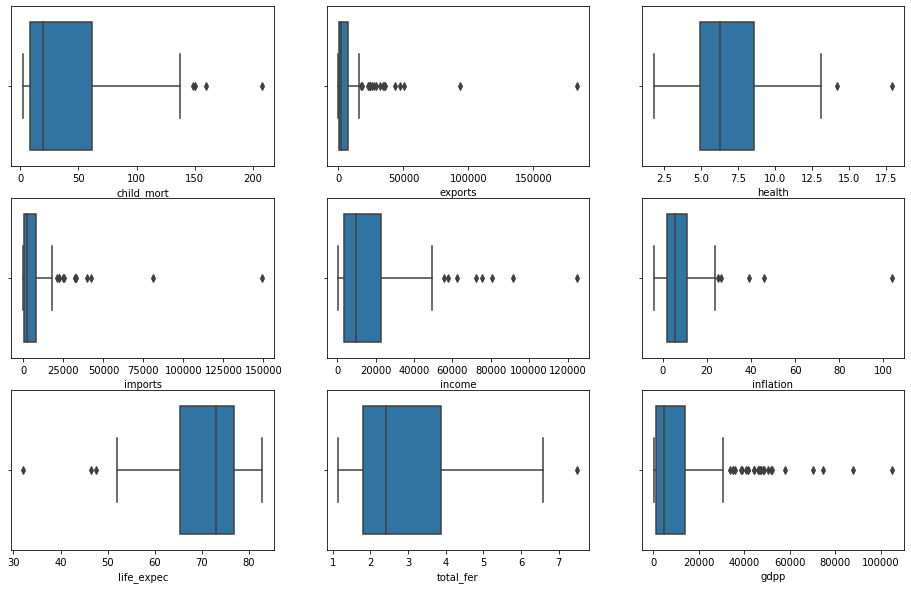

In [90]:
# Checking data for outliers
columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize = (16,10))
for i in enumerate(columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= i[1], data = country_data)
#     plt.title(i[1])

In [91]:
# Outlier Treatment in the data
for items in columns:
    Q1= country_data[items].quantile(0.05)
    Q2= country_data[items].quantile(0.95)
    IQR = Q2-Q1
    country_data =country_data[(country_data[items]>=(Q1-1.5*IQR)) & (country_data[items]<=(Q2+1.5*IQR))]

In [92]:
country_data.shape

(163, 10)

### Univariate Analysis

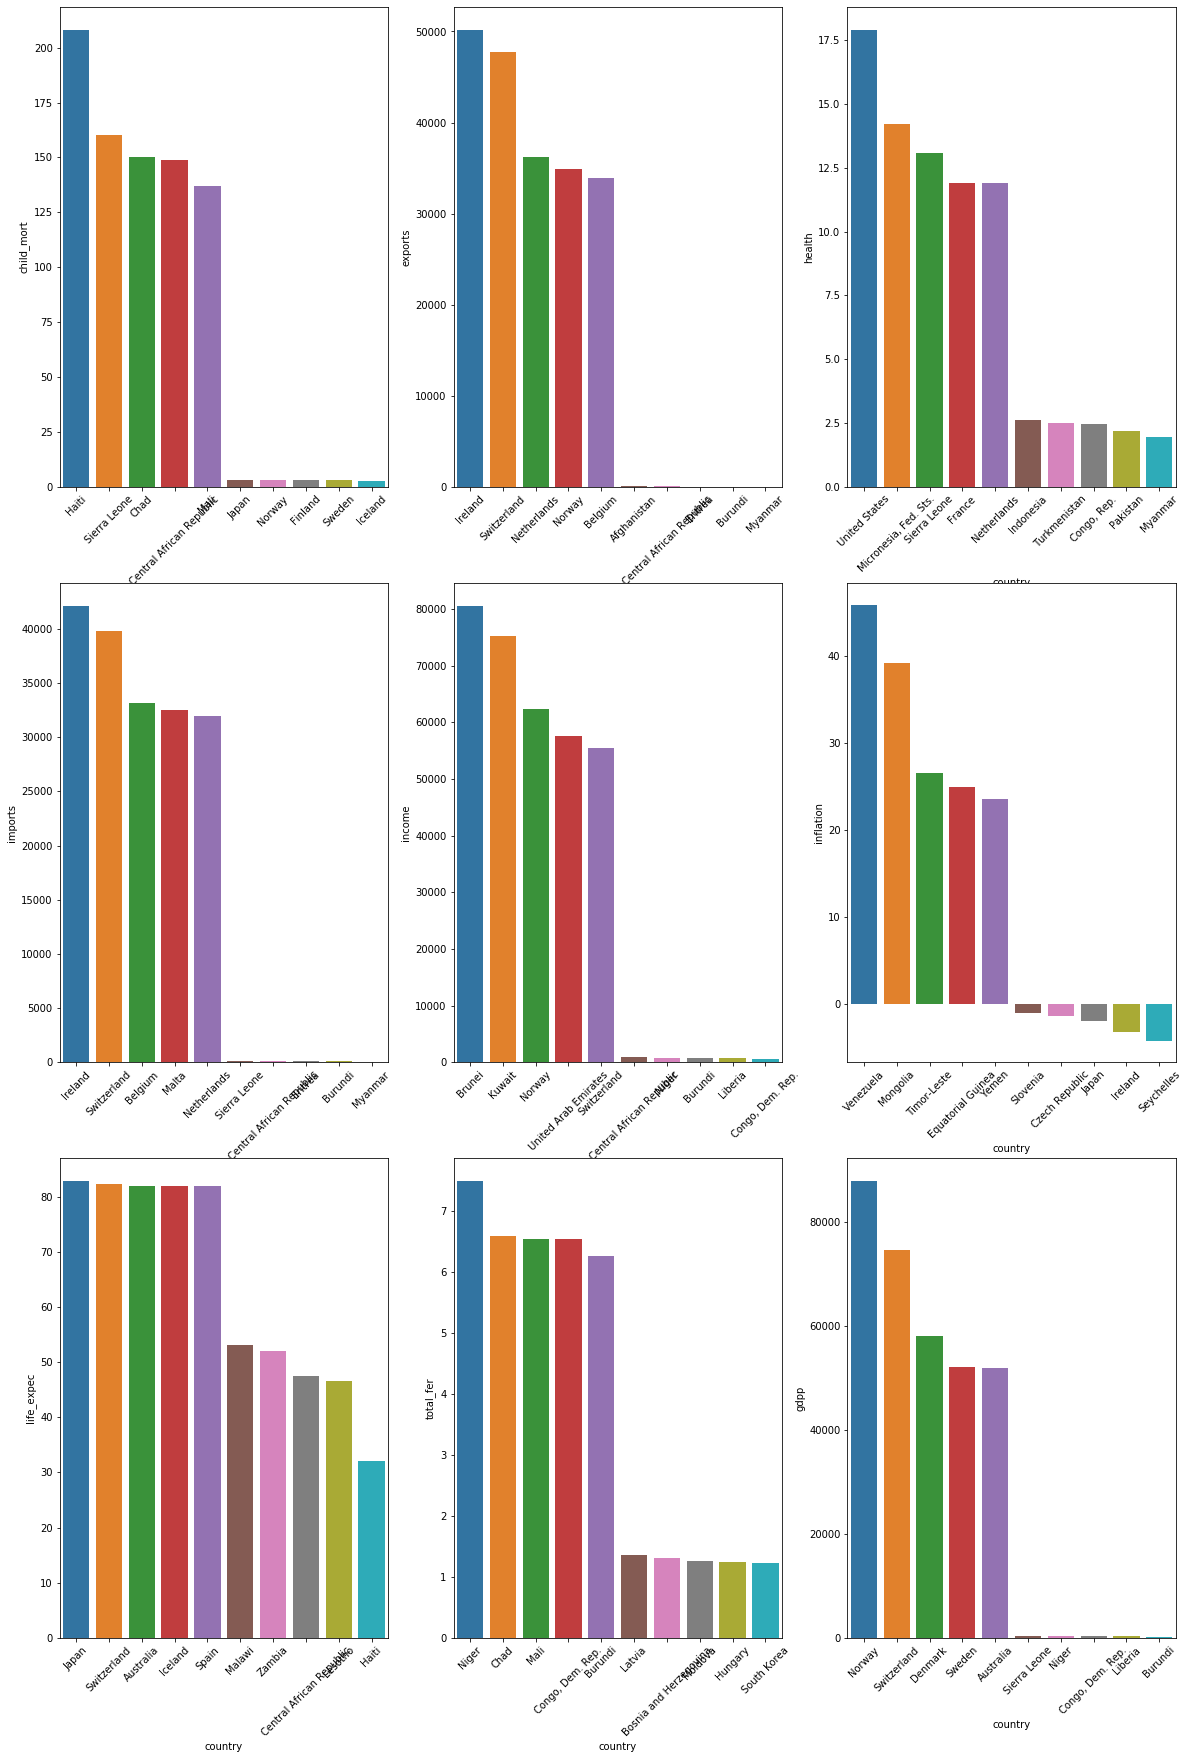

In [93]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
i=1
plt.figure(figsize = (20,30))
for items in columns:
    plt.subplot(3,3,i)
    bottom5 = country_data[['country',items]].nsmallest(5, items)
    top5 = country_data[['country',items]].nlargest(5, items)
    top5_bot5 = top5.append(bottom5)
    top5_bot5.sort_values(by = items, ascending = False, inplace=True)
    sns.barplot(x='country', y=items, data= top5_bot5)
    plt.xticks(rotation=45)
    i=i+1


<Figure size 1440x1440 with 0 Axes>

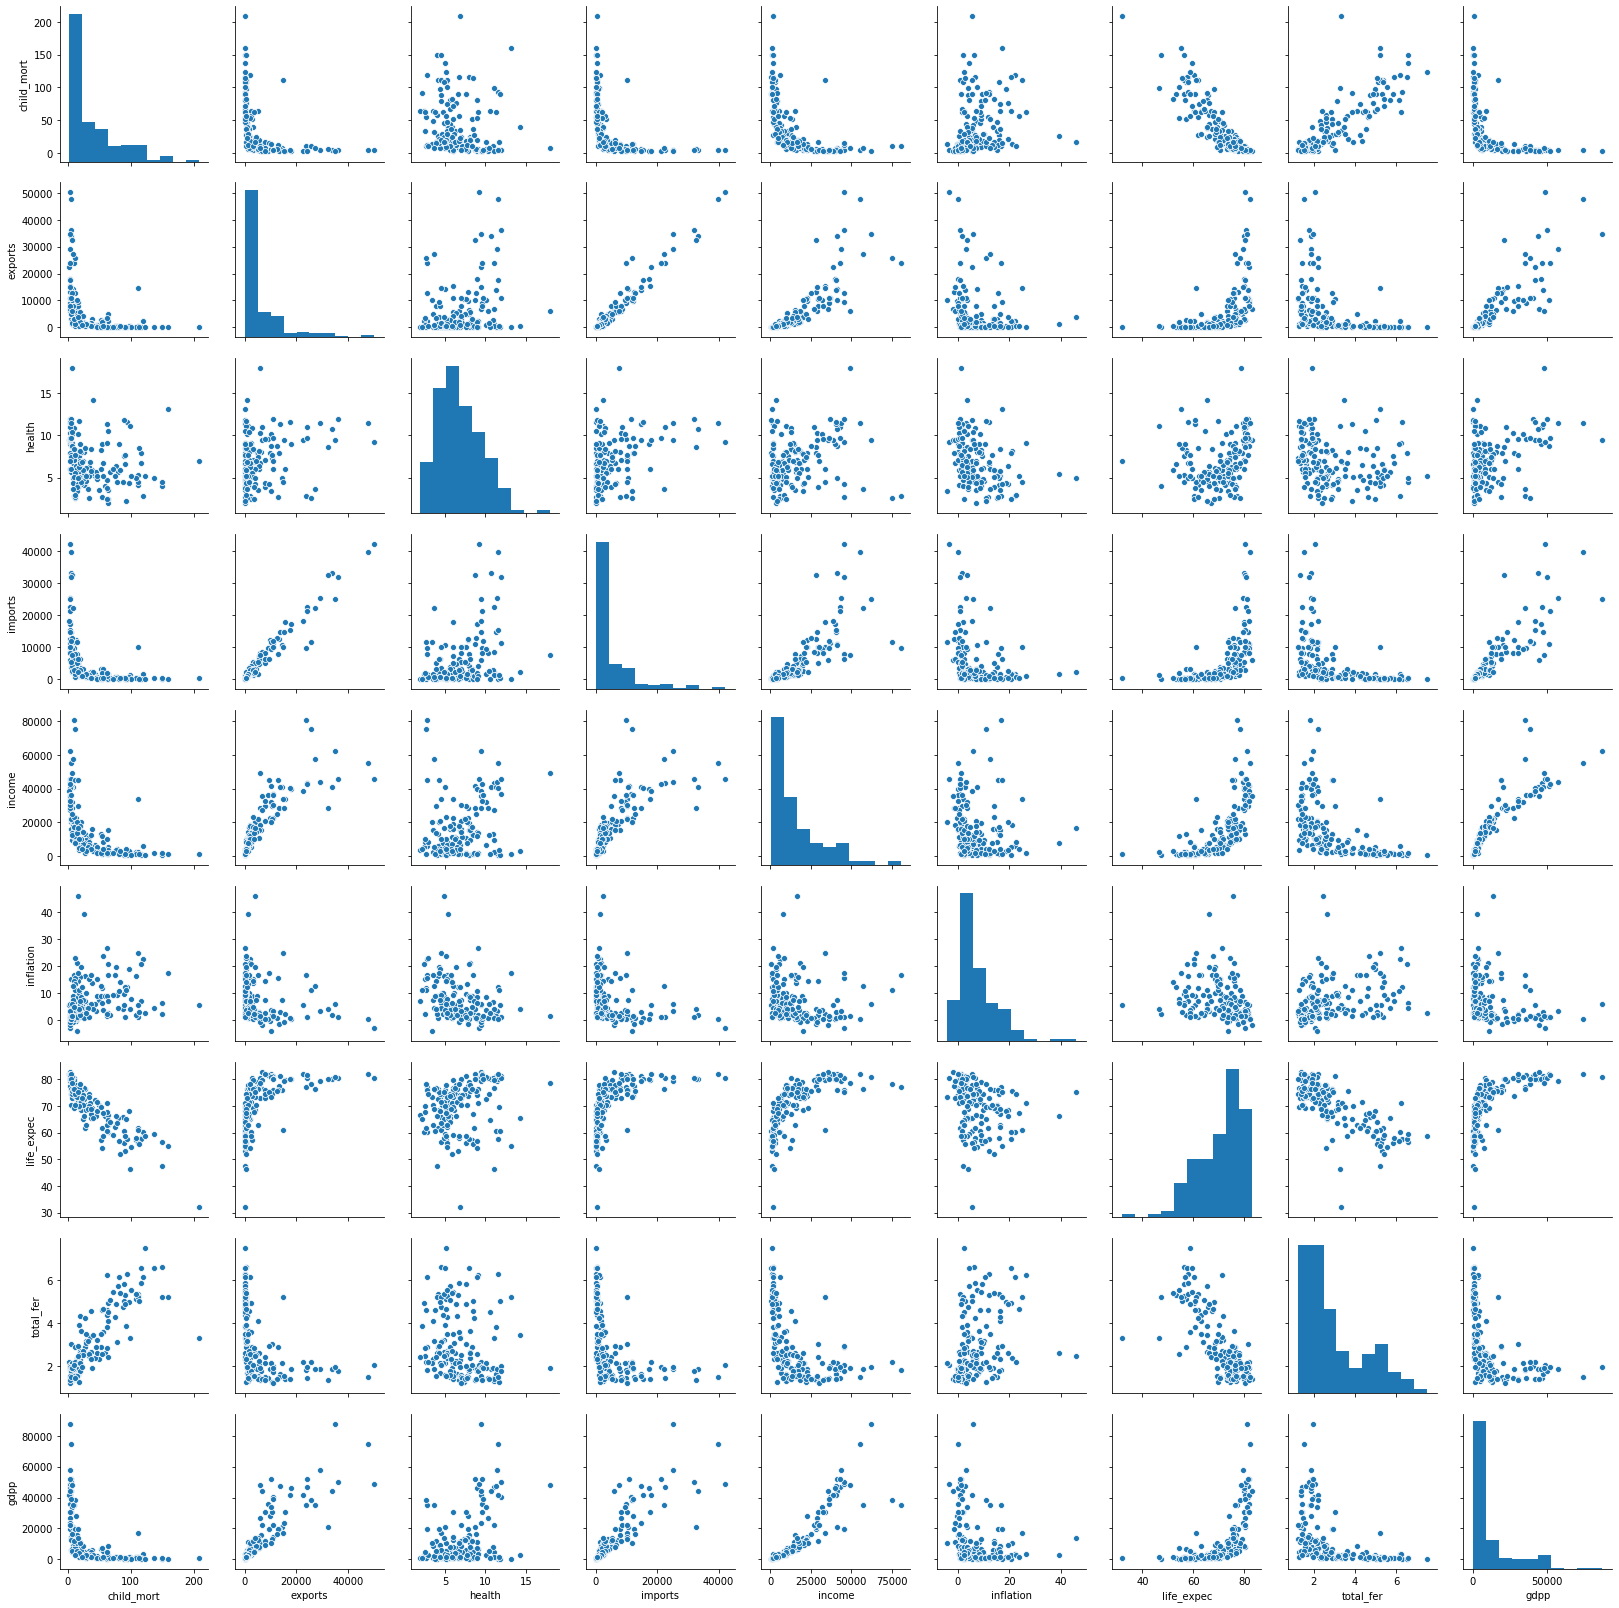

In [94]:
# Pair plot to understand the corelation betwen variables
plt.figure(figsize=(20,20))
sns.pairplot(country_data)

###  
1. Income and GDP have very strong linear relationship and are positively co-related.
2. Life expectancy and child mortality are negetively co-related.

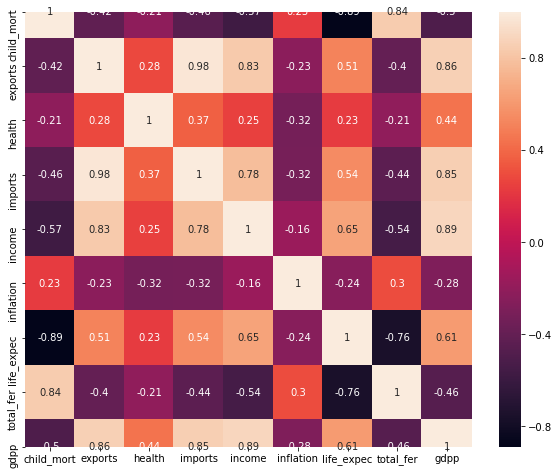

In [95]:
plt.figure(figsize = (10,8))
sns.heatmap(country_data.corr(), annot=True)

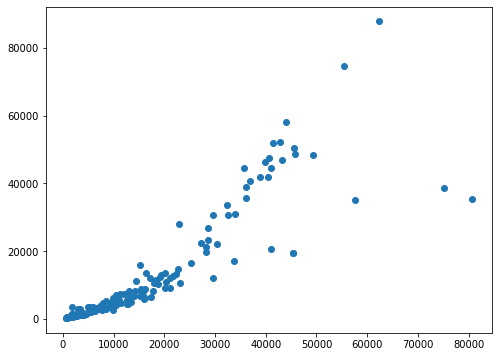

In [96]:
plt.figure(figsize =(8,6))
plt.scatter(x= country_data["income"], y= country_data["gdpp"])

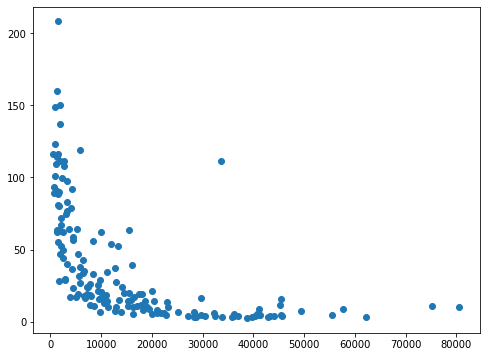

In [97]:
plt.figure(figsize =(8,6))
plt.scatter(x= country_data["income"], y= country_data["child_mort"])

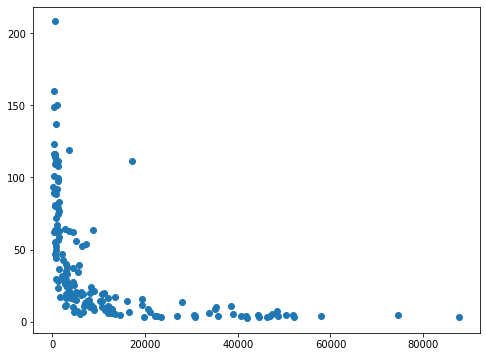

In [98]:
plt.figure(figsize =(8,6))
plt.scatter(x= country_data["gdpp"], y= country_data["child_mort"])

### Preparing the data for PCA

In [99]:
# Removing the country column from the data set 
countries = country_data[["country"]]
country_data1 = country_data.drop("country", axis =1)

In [100]:
#Understanding the variance in original data
round((country_data1.var()/sum(country_data1.var()))*100,2)

child_mort     0.00
exports       12.47
health         0.00
imports        9.03
income        38.52
inflation      0.00
life_expec     0.00
total_fer      0.00
gdpp          39.98
dtype: float64

### Scaling and transformation of data

In [101]:
# Normalizing the data
scaler = StandardScaler()
country_data_norm = scaler.fit_transform(country_data1)

In [102]:
country_data_norm.max()

5.150614566562672

In [103]:
#Understanding the variance in original data
round((country_data1.var()/sum(country_data1.var()))*100,2)

child_mort     0.00
exports       12.47
health         0.00
imports        9.03
income        38.52
inflation      0.00
life_expec     0.00
total_fer      0.00
gdpp          39.98
dtype: float64

In [104]:
# running the PCA 
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized',random_state=42)
pca.fit(country_data_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [105]:
pca.components_

array([[-0.33630084,  0.37455407,  0.18768193,  0.38281358,  0.38749598,
        -0.16586827,  0.35980409, -0.3206591 ,  0.39356523],
       [ 0.49947724,  0.35480762,  0.22104495,  0.32480971,  0.13769653,
        -0.00629543, -0.38151161,  0.48194681,  0.27101295],
       [-0.02191369,  0.19092019, -0.60122062,  0.07138664,  0.2556076 ,
         0.72201708,  0.05445148,  0.05364614,  0.06340501],
       [-0.0968529 , -0.14975092,  0.72430265, -0.1341252 , -0.00935207,
         0.64542253,  0.07127352,  0.00144362,  0.06205311],
       [-0.03247115,  0.32689397,  0.05898991,  0.44595999, -0.4372706 ,
         0.16530245, -0.33918413, -0.46728892, -0.37120149],
       [ 0.23778189, -0.1569265 ,  0.00132197, -0.28116802,  0.44392424,
        -0.01313024, -0.51921328, -0.58274357,  0.18265541],
       [-0.6737773 ,  0.09971379,  0.05761388, -0.05860892,  0.32386458,
        -0.0697533 , -0.48655842,  0.3192828 , -0.28441616],
       [-0.34054534, -0.16699659, -0.147621  ,  0.01818124, -0

In [106]:
# variance explained by the PCA compements
var_exp = pca.explained_variance_ratio_

In [107]:
#Cumulative variance explained by PCA components
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.57968618, 0.73180941, 0.85326233, 0.92771732, 0.9556061 ,
       0.98128787, 0.9911433 , 0.99878253, 1.        ])

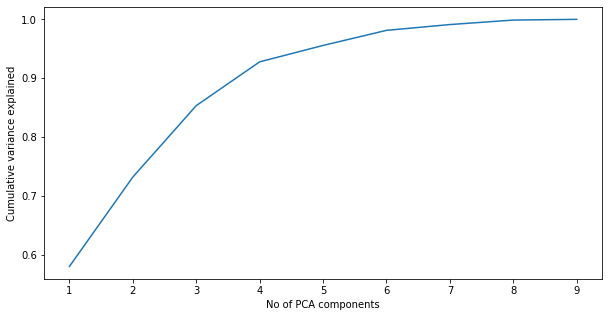

In [108]:
# Plotting the scree plot
fig = plt.figure(figsize=[10,5])
plt.plot(range(1,10),var_cumu)
plt.ylabel("Cumulative variance explained")
plt.xlabel("No of PCA components")
plt.show()

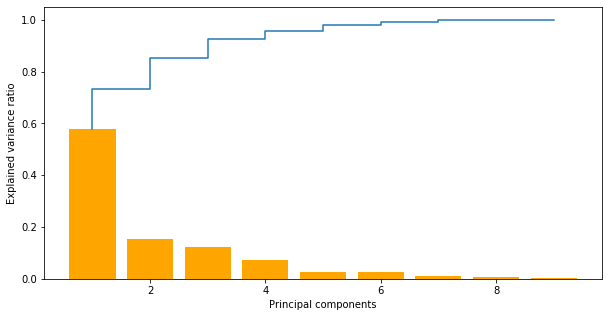

In [109]:
# Plotting the cumulative explained variance
plt.figure(figsize=(10, 5))
plt.bar(range(1,10), var_exp, label='individual explained variance', color = 'orange')
plt.step(range(1,10), var_cumu,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [110]:
# considering the ~95% of varaince data no of components were decided as 5
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [111]:
country_data_pca = pca_final.fit_transform(country_data_norm)
country_data_pca.shape

(163, 5)

In [112]:
# converting the PCA components to new data frame
country_data_pca = pd.DataFrame(country_data_pca)
country_data_pca.columns = ["PC1","PC2","PC3","PC4","PC5"]

In [113]:
country_data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.732037,1.498411,-0.398403,0.286236,-0.077512
1,0.061289,-1.465259,-0.443890,-0.123060,-0.082589
2,-0.630734,-1.111775,1.295468,0.234704,-0.188139
3,-3.171746,1.636251,2.047930,0.065070,-0.108856
4,0.927332,-0.844077,-0.274852,-0.634625,-0.087410


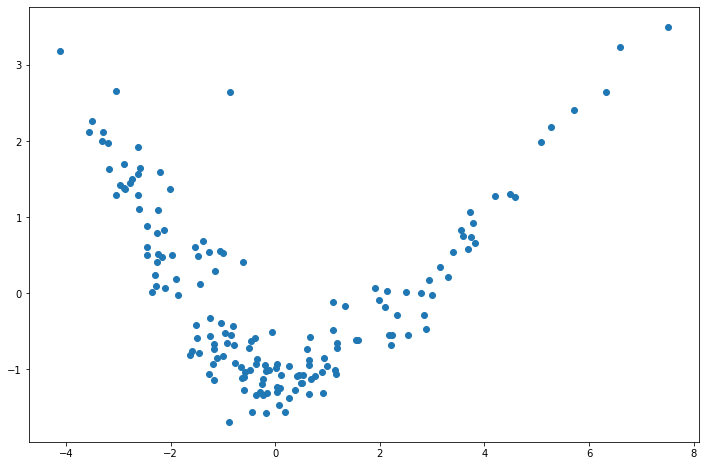

In [114]:
# visualizing the PCA components
plt.figure(figsize = (12,8))
plt.scatter(x= "PC1", y = "PC2", data = country_data_pca)

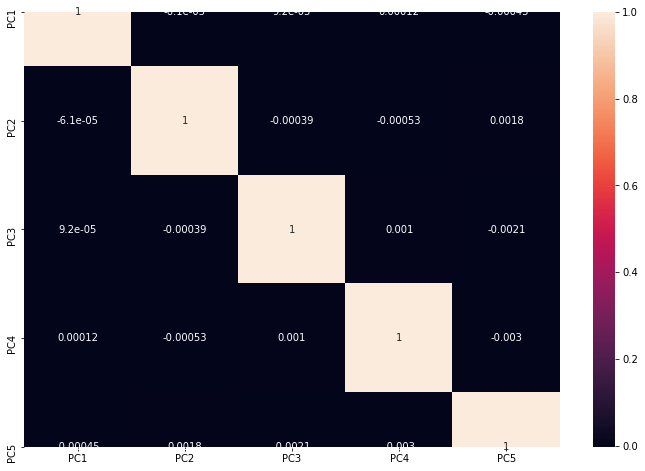

In [115]:
# visualizing the corelation matrix for PCA components
plt.figure(figsize = (12,8))
sns.heatmap(country_data_pca.corr(),annot = True)

In [116]:
# checking Hopkins statistics for clustering tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [117]:
hopkins(country_data_pca)

0.7659344641774684

# Kmeans Clustering

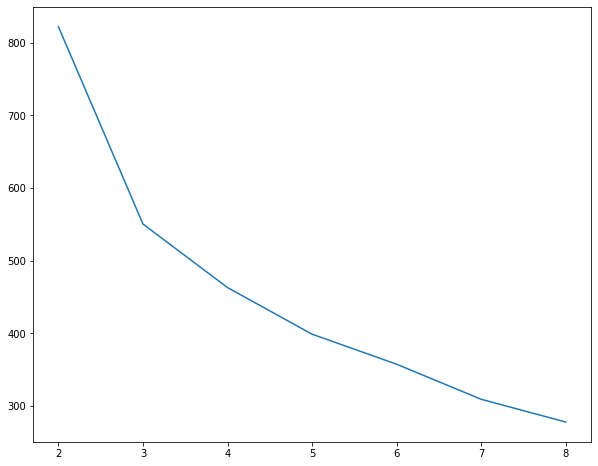

In [118]:
# Elbow Curve to find the no of K
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_data_pca)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.figure(figsize = (10,8))
plt.plot(range_n_clusters,ssd)

In [119]:
# silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhoutte =[]

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k).fit(country_data_pca)
    # silhouette score
    score = silhouette_score(country_data_pca, kmeans.labels_) 
    silhoutte.append(score)
    
silhoutte

[0.43173132502897665,
 0.37450055512790936,
 0.3561680709237517,
 0.32013319967516096,
 0.2746492304660753,
 0.2970445316357136,
 0.26558827819359865]

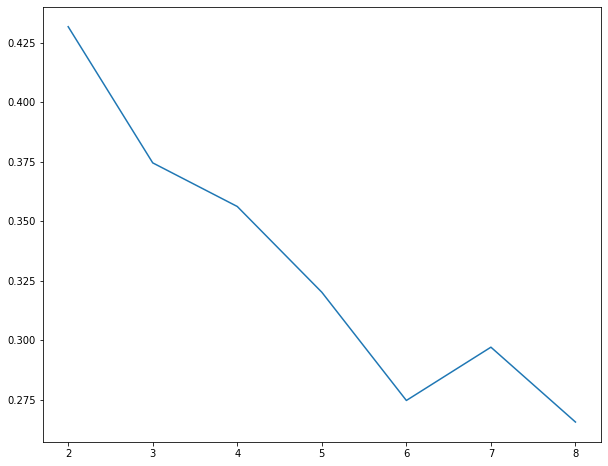

In [120]:
plt.figure(figsize = (10,8))
plt.plot(range_n_clusters,silhoutte)

Scaling/Standardising
• standard_scaler = StandardScaler()
• K Means Clustering
• model_clus = KMeans(n_clusters = num_clusters, max_iter=_)
• Hierarchical Clustering
• mergings = linkage(X, method = "single/complete/average", metric='euclidean')
 dendrogram(mergings)
• Cutting the Cluster
• clusterCut = pd.Series(cut_tree(mergings, n_clusters = num_clusters).reshape(-1,))

In [121]:
# Considering no of clusters =3
Kmean = KMeans(n_clusters=3)
Kmean.fit(country_data_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [122]:
Kmean.labels_

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 0,
       1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1])

In [123]:
country_data["clusterID_Kmean"]=Kmean.labels_
country_data_pca["clusterID_Kmean"]=Kmean.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID_Kmean
0,Afghanistan,90.2,55.30,7.58,248.30,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,6.55,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,4.17,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,2.85,1514.37,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,6.03,7185.80,19100,1.44,76.8,2.13,12200,2


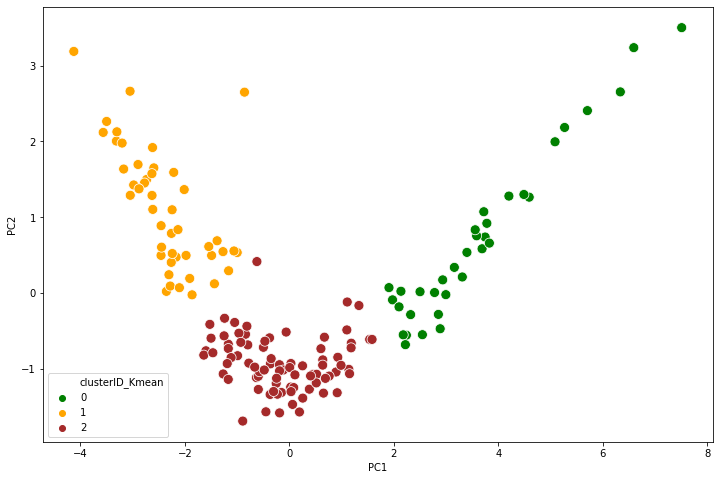

In [124]:
# visualizing the clustering for PCA components
plt.figure(figsize = (12,8))
sns.scatterplot(x= "PC1", y = "PC2", hue = "clusterID_Kmean", s=100,palette=['green','orange','brown'],data = country_data_pca)

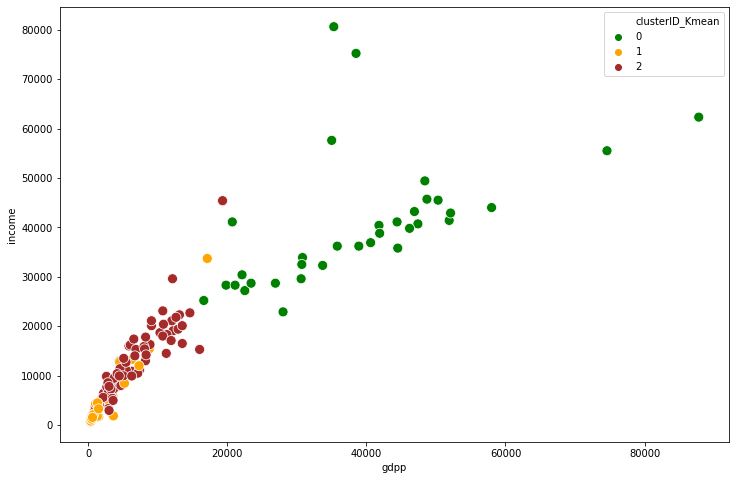

In [125]:

# visualizing the PCA components
plt.figure(figsize = (12,8))
sns.scatterplot(x= "gdpp", y = "income", hue = "clusterID_Kmean", s=100,palette=['green','orange','brown'],data = country_data)

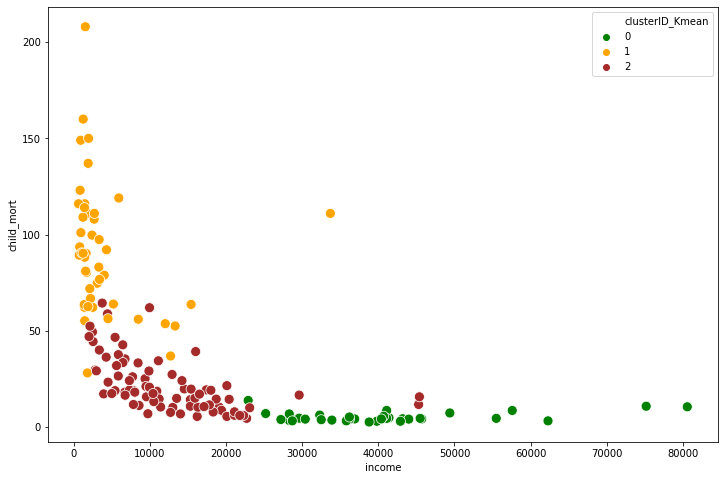

In [126]:
# visualizing the PCA components
plt.figure(figsize = (12,8))
sns.scatterplot(x= "income", y = "child_mort", hue = "clusterID_Kmean", s=100,palette=['green','orange','brown'],data = country_data)

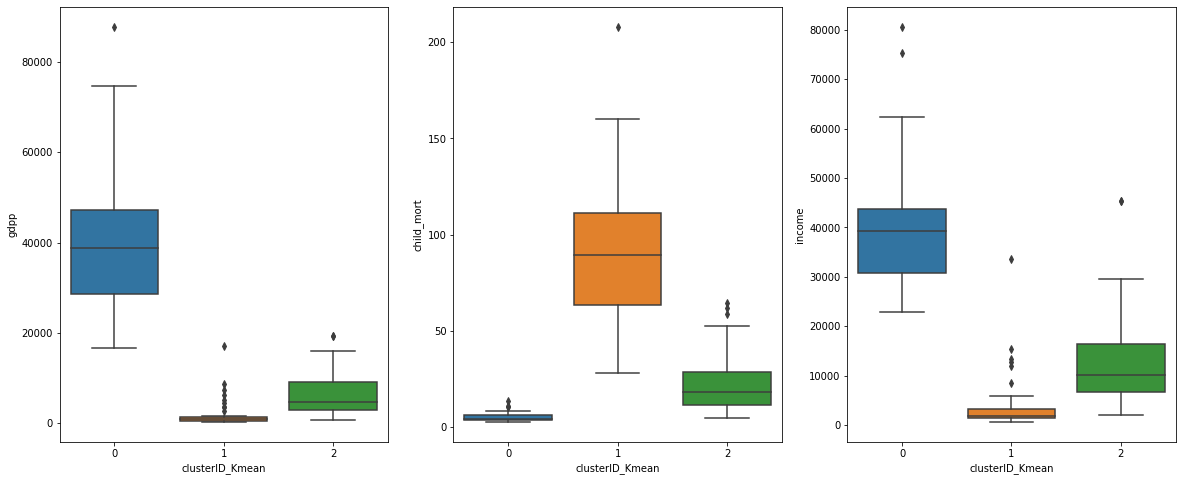

In [127]:
plt.figure(figsize =(20,8))
i = 1
for items in ["gdpp", "child_mort","income"]:
    plt.subplot(1,3,i)
    sns.boxplot(x=country_data["clusterID_Kmean"], y=country_data[items])
    i = i+1

# Hierarchical Clustering

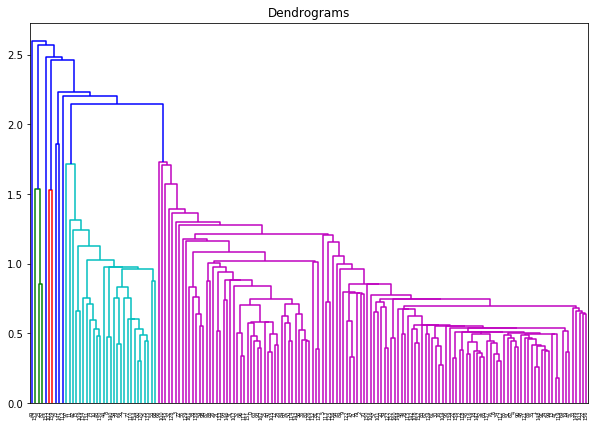

In [128]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(country_data_pca, method='single')) 

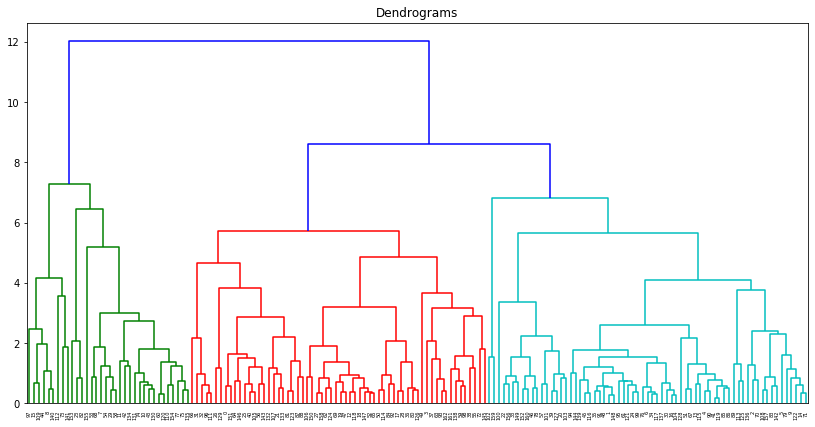

In [129]:
plt.figure(figsize=(14, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(country_data_pca, method='complete')) # complete method selected as this gave distinct clusters compared to complete method.

In [130]:
# Looking at the dendogram we can cut the dendogram at n = 3 

In [131]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
Hier_label = np.array(cluster.fit_predict(country_data_pca))
Hier_label

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 0,
       0, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 0,
       2, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2], dtype=int64)

In [132]:
country_data["clusterID_Hier"]=Hier_label
country_data_pca['clusterID_Hier']= Hier_label
country_data.head()


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID_Kmean,clusterID_Hier
0,Afghanistan,90.2,55.30,7.58,248.30,1610,9.44,56.2,5.82,553,1,2
1,Albania,16.6,1145.20,6.55,1987.74,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,1712.64,4.17,1400.44,12900,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,2199.19,2.85,1514.37,5900,22.40,60.1,6.16,3530,1,2
4,Antigua and Barbuda,10.3,5551.00,6.03,7185.80,19100,1.44,76.8,2.13,12200,2,1


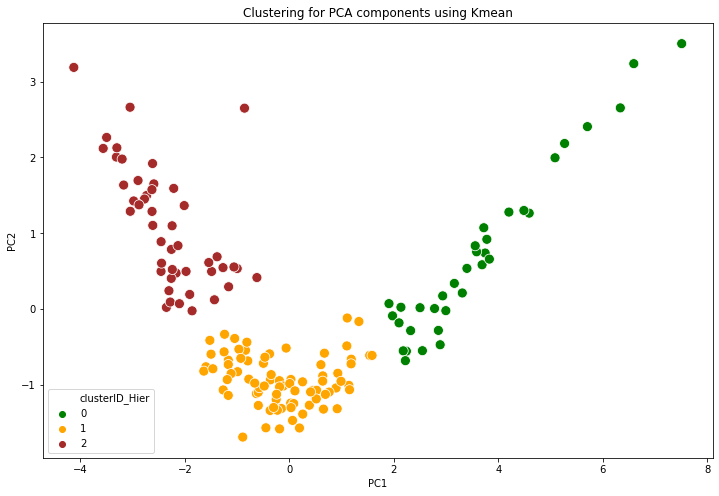

In [133]:
# visualizing the PCA components
plt.figure(figsize = (12,8))
plt.title("Clustering for PCA components using Kmean")
sns.scatterplot(x= "PC1", y = "PC2", hue = "clusterID_Hier", s=100,palette=['green','orange','brown'],data = country_data_pca)

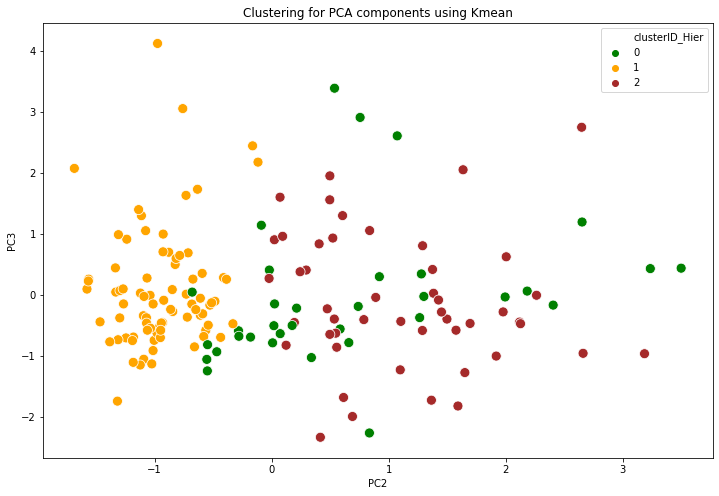

In [134]:
# visualizing the PCA components
plt.figure(figsize = (12,8))
plt.title("Clustering for PCA components using Kmean")
sns.scatterplot(x= "PC2", y = "PC3", hue = "clusterID_Hier", s=100,palette=['green','orange','brown'],data = country_data_pca)

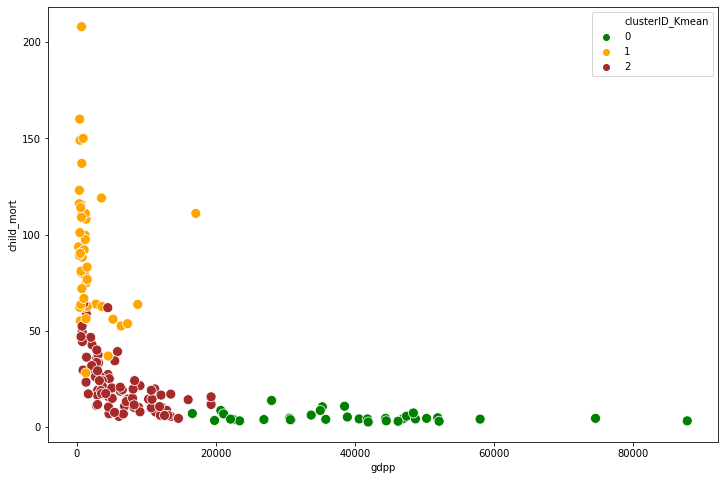

In [135]:
# visualizing the PCA components

plt.figure(figsize = (12,8))
sns.scatterplot(x= "gdpp", y = "child_mort", hue = "clusterID_Kmean", s=100,palette=['green','orange','brown'],data = country_data)

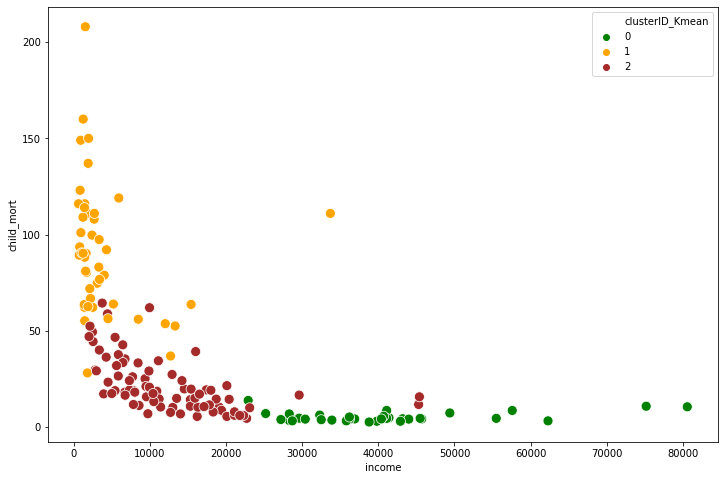

In [136]:
# visualizing the PCA components
plt.figure(figsize = (12,8))
sns.scatterplot(x= "income", y = "child_mort", hue = "clusterID_Kmean", s=100,palette=['green','orange','brown'],data = country_data)

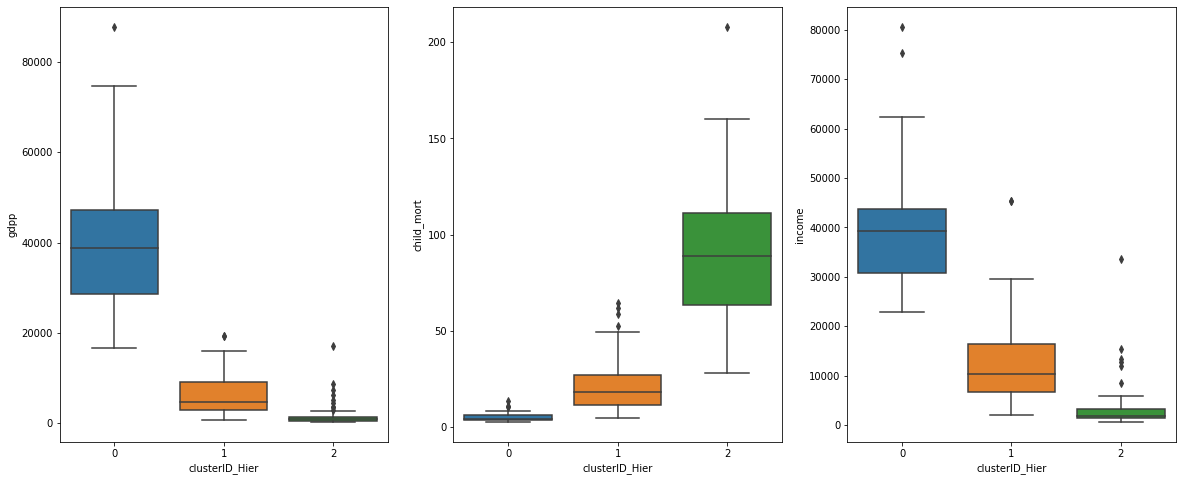

In [137]:
plt.figure(figsize =(20,8))
i = 1
for items in ["gdpp", "child_mort","income"]:
    plt.subplot(1,3,i)
    sns.boxplot(x=country_data["clusterID_Hier"], y=country_data[items])
    i = i+1

In [138]:
# Filtering the countries of cluster 2 for which the GDP is low and child mortality is high

country_req = country_data[country_data["clusterID_Hier"]==2]
# 10 Countries with lowest GDP and High child mortality rate
country_req.sort_values(by ="gdpp", ascending = True, inplace = True)
country_req_top10 = country_req[1:10]
country_req_top10

C:\Users\SXP7027\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID_Kmean,clusterID_Hier
88,Liberia,89.3,62.46,11.80,302.80,700,5.47,60.8,5.02,327,1,2
37,"Congo, Dem. Rep.",116.0,137.27,7.91,165.66,609,20.80,57.5,6.54,334,1,2
112,Niger,123.0,77.26,5.16,170.87,814,2.55,58.8,7.49,348,1,2
132,Sierra Leone,160.0,67.03,13.10,137.66,1220,17.20,55.0,5.20,399,1,2
93,Madagascar,62.2,103.25,3.77,177.59,1390,8.79,60.8,4.60,413,1,2
106,Mozambique,101.0,131.99,5.21,193.58,918,7.64,54.5,5.56,419,1,2
31,Central African Republic,149.0,52.63,3.98,118.19,888,2.01,47.5,5.21,446,1,2
94,Malawi,90.5,104.65,6.59,160.19,1030,12.10,53.1,5.31,459,1,2
50,Eritrea,55.2,23.09,2.66,112.31,1420,11.60,61.7,4.61,482,1,2


In [139]:
# 5 Countries with lowest GDP and High child mortality rate
country_req_top10.sort_values(by ="child_mort", ascending = False, inplace = True)
country_req_top10.head(5)

C:\Users\SXP7027\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusterID_Kmean,clusterID_Hier
132,Sierra Leone,160.0,67.03,13.10,137.66,1220,17.20,55.0,5.20,399,1,2
31,Central African Republic,149.0,52.63,3.98,118.19,888,2.01,47.5,5.21,446,1,2
112,Niger,123.0,77.26,5.16,170.87,814,2.55,58.8,7.49,348,1,2
37,"Congo, Dem. Rep.",116.0,137.27,7.91,165.66,609,20.80,57.5,6.54,334,1,2
106,Mozambique,101.0,131.99,5.21,193.58,918,7.64,54.5,5.56,419,1,2
